# Clustering Analysis


## Geographical Clustering

1. We want to cluster the states based on the number of incidents per state. We will use the K-Means algorithm.
2. We can explore if some regions or states have similar incidents characteristics.

In [1]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py

# for dataset visibility
pd.set_option('display.max_columns', None)

# Set a seed for reproducibility
np.random.seed(42)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df_merged_clustering = pd.read_hdf('../ds/cleaned/clustering.h5')
df_merged = pd.read_csv('../ds/cleaned/merged.csv')

In [3]:
# Import libraries for K-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm



# Select the features we want to use for clustering: States because we want incidents per state
# Let's encode the states with coordinate of our tuples of latitude and longitude

""" The way kmeans algorithm works is as follows:

    Specify number of clusters K.
    Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
    Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

    Compute the sum of the squared distance between data points and all centroids.
    Assign each data point to the closest cluster (centroid).
    Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.
"""

""" DENSITY_INCIDENT_STATE = False

if DENSITY_INCIDENT_STATE:
    ## KMenas clustering for incident x state using the density of incidents per state
    X = df_merged[['density_incident_state']].values
else:
    # Assuming df is your DataFrame with latitude and longitude columns
    X = df[['latitude', 'longitude']]
"""

#X = df_merged[['povertyPercentage']].values
 
X = df_merged_clustering[['candidatevotes', 'totalvotes']].values 

# Standardize the features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# We want to cluster the states based on the number of incidents per state
# We want to find the optimal number of clusters using the elbow method
# We want to use the silhouette score to evaluate the quality of the clusters

# We will try different number of clusters from 2 to 10
n_clusters = np.arange(2, 11)

silhouette_scores = []
inertia_scores = []
kmeans_models = []
elbow_scores = []

# For each number of clusters
for n in tqdm(n_clusters):
    # Initialize the KMeans model with n_clusters=n
    # Use KMenans++ initialization for faster convergence
    kmeans = KMeans(n_clusters=n, random_state=42,
                    n_init=10, max_iter=100, algorithm='lloyd', init='k-means++')

    # Fit the model
    kmeans.fit(X)
    print("Current model:", kmeans)
    
    # Get the inertia score
    inertia_scores.append(kmeans.inertia_)
    print("Current inertia score:", kmeans.inertia_)
    
    # Get the silhouette score
    #silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    #print("Current silhouette score:", silhouette_score(X, kmeans.labels_))
    
    # Store the model
    kmeans_models.append(kmeans)

 11%|█         | 1/9 [00:01<00:08,  1.03s/it]

Current model: KMeans(max_iter=100, n_clusters=2, n_init=10, random_state=42)
Current inertia score: 474637215054524.6


 22%|██▏       | 2/9 [00:02<00:08,  1.18s/it]

Current model: KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=42)
Current inertia score: 175734786027315.7


 33%|███▎      | 3/9 [00:03<00:07,  1.22s/it]

Current model: KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=42)
Current inertia score: 113834156430509.75


 44%|████▍     | 4/9 [00:04<00:06,  1.23s/it]

Current model: KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=42)
Current inertia score: 87137076695503.72


 56%|█████▌    | 5/9 [00:06<00:05,  1.25s/it]

Current model: KMeans(max_iter=100, n_clusters=6, n_init=10, random_state=42)
Current inertia score: 73546802008822.06


 67%|██████▋   | 6/9 [00:07<00:03,  1.33s/it]

Current model: KMeans(max_iter=100, n_clusters=7, n_init=10, random_state=42)
Current inertia score: 61457903703246.22


 78%|███████▊  | 7/9 [00:08<00:02,  1.26s/it]

Current model: KMeans(max_iter=100, n_init=10, random_state=42)
Current inertia score: 52380738705961.94


 89%|████████▉ | 8/9 [00:10<00:01,  1.32s/it]

Current model: KMeans(max_iter=100, n_clusters=9, n_init=10, random_state=42)
Current inertia score: 44832789781369.63


100%|██████████| 9/9 [00:11<00:00,  1.31s/it]

Current model: KMeans(max_iter=100, n_clusters=10, n_init=10, random_state=42)
Current inertia score: 40259225954461.5


# Eblow method to get ideal number of clusters

We can see that the ideal number of clusters is 5.

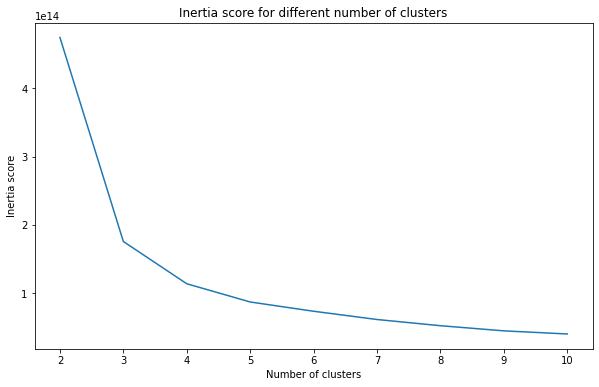

In [5]:
# Plot the inertia score for each number of clusters o
plt.figure(figsize=(10, 6))
plt.plot(n_clusters, inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia score')
plt.title('Inertia score for different number of clusters')
plt.show()


In [8]:
N_CLUSTER_PREDICT = 3

df_clusters = df_merged.copy()

# Add the cluster labels to the dataframe
# We do -2 because we start from 2 clusters
df_clusters['cluster'] = kmeans_models[N_CLUSTER_PREDICT-2].labels_

# centroids
centroids = kmeans_models[N_CLUSTER_PREDICT-2].cluster_centers_

# For logitude and latitude clustering visualization

# Poverty Percentage clustering

#todo

# Votes clustering

As expected we have three clusters, one for each party.

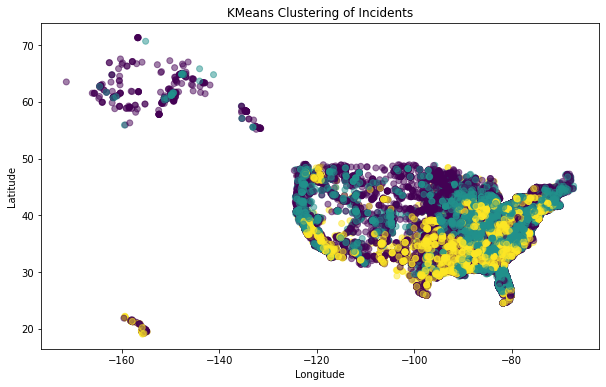

In [9]:
# Visualize the clusters (scatter plot of latitude and longitude with different colors for each cluster)
plt.figure(figsize=(10, 6))

plt.scatter(df_clusters['longitude'], df_clusters['latitude'], c=df_clusters['cluster'], cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering of Incidents')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## For density incident state

This should be executed only if clustering is done on that feature.

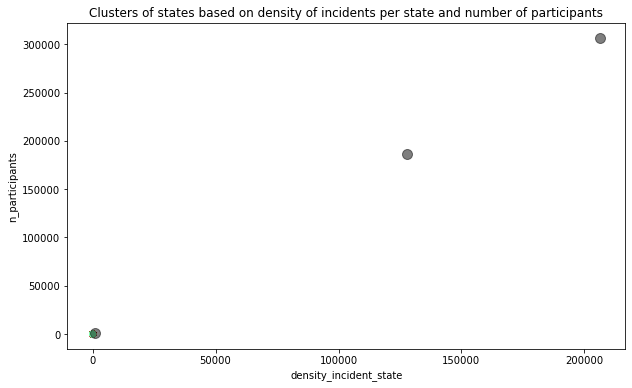

In [12]:

# Not execute this cell if DENSITY_INCIDENT_STATE is False to do it in ipynb use: 


# Visualizing cluster
plt.figure(figsize=(10, 6))

# Plot the clusters
plt.scatter(df_clusters['density_incident_state'], df_clusters['n_participants'], c=df_clusters['cluster'], cmap='rainbow')
# add centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.5)
plt.xlabel('density_incident_state')
plt.ylabel('n_participants')
plt.title('Clusters of states based on density of incidents per state and number of participants')
plt.show()
